In [1]:
# WildInsight - EDA on Cleaned Animal Intake Data\n\nExploratory Data Analysis using pandas, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load cleaned intake data
df = pd.read_csv('../data/processed/cleaned_intakes.csv')

# Basic overview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154066 entries, 0 to 154065
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         154066 non-null  object
 1   name              154063 non-null  object
 2   datetime          154066 non-null  object
 3   monthyear         154066 non-null  object
 4   found_location    154066 non-null  object
 5   intake_type       154066 non-null  object
 6   intake_condition  154066 non-null  object
 7   animal_type       154066 non-null  object
 8   sex_upon_intake   154066 non-null  object
 9   age_upon_intake   154066 non-null  object
 10  breed             154066 non-null  object
 11  color             154066 non-null  object
 12  month             154066 non-null  int64 
 13  year              154066 non-null  int64 
 14  season            154066 non-null  object
dtypes: int64(2), object(13)
memory usage: 17.6+ MB


,animal_id,name,datetime,monthyear,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,month,year,season
0,A895552,Milo,2023-12-31 13:51:00,December 2023,Austin (TX),Owner Surrender,Normal,Cat,Unknown,6 Years,Domestic Shorthair,Blue Tabby-White,12,2023,Winter
1,A895551,Tom,2023-12-31 13:51:00,December 2023,Austin (TX),Owner Surrender,Normal,Cat,Unknown,6 Years,Domestic Shorthair,Blue Tabby-White,12,2023,Winter
2,A894556,Kanna,2023-12-31 11:42:00,December 2023,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,6 Months,Shiba Inu/Chihuahua Shorthair,Brown,12,2023,Winter
3,A895537,Buddy,2023-12-30 20:38:00,December 2023,10940 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 Years,Doberman Pinsch Mix,Red,12,2023,Winter
4,A895534,Charlotte,2023-12-30 17:52:00,December 2023,12Th And Airport in Austin (TX),Stray,Normal,Cat,Spayed Female,3 Years,Domestic Shorthair,Brown Tabby-White,12,2023,Winter


Normal      131529
Injured       9265
Sick          6819
Nursing       3821
Neonatal      1139
Name: intake_condition, dtype: int64


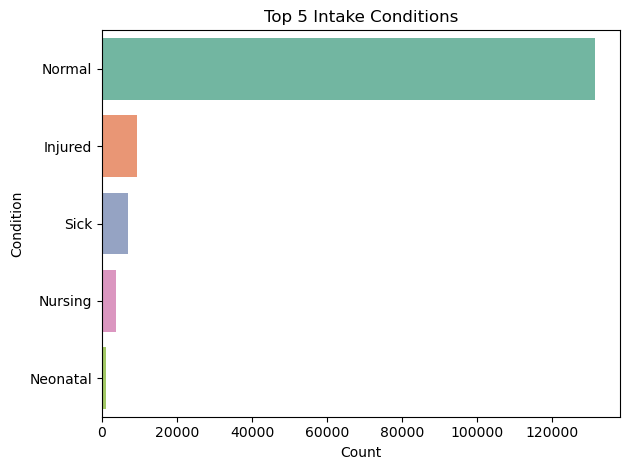

In [3]:
# Top 5 Most Common Intake Conditions
top_conditions = df['intake_condition'].value_counts().head(5)
print(top_conditions)

sns.countplot(data=df[df['intake_condition'].isin(top_conditions.index)],
              y='intake_condition',
              order=top_conditions.index,
              palette='Set2')
plt.title("Top 5 Intake Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.tight_layout()
plt.savefig('../visualizations/top_intake_conditions.png')
plt.show()

Stable      89.16698
Critical    10.83302
Name: condition_status, dtype: float64


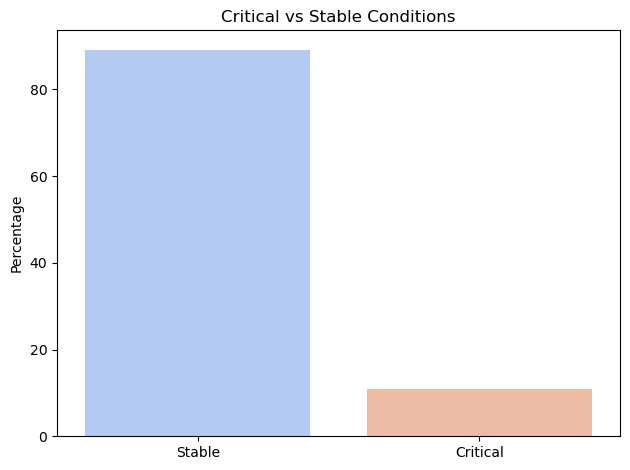

In [4]:
# % of Animals in Critical vs Stable Condition
critical_conditions = ["Injured", "Sick", "Critical", "Feral", "Aged"]
df['condition_status'] = df['intake_condition'].apply(lambda x: 'Critical' if x in critical_conditions else 'Stable')
condition_counts = df['condition_status'].value_counts(normalize=True) * 100
print(condition_counts)

sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='coolwarm')
plt.ylabel("Percentage")
plt.title("Critical vs Stable Conditions")
plt.tight_layout()
plt.savefig('../visualizations/condition_status_percent.png')
plt.show()

In [5]:
# Average Intake Condition by Animal Type
animal_condition = df.groupby(['animal_type', 'intake_condition']).size().reset_index(name='count')
top_animal_conditions = animal_condition.sort_values(['animal_type', 'count'], ascending=[True, False])
top_animal_conditions.head(10)

,animal_type,intake_condition,count
1,Bird,Normal,546
0,Bird,Injured,212
3,Bird,Sick,12
2,Bird,Other,8
14,Cat,Normal,50025
8,Cat,Injured,3720
19,Cat,Sick,2791
15,Cat,Nursing,2532
12,Cat,Neonatal,775
7,Cat,Feral,118


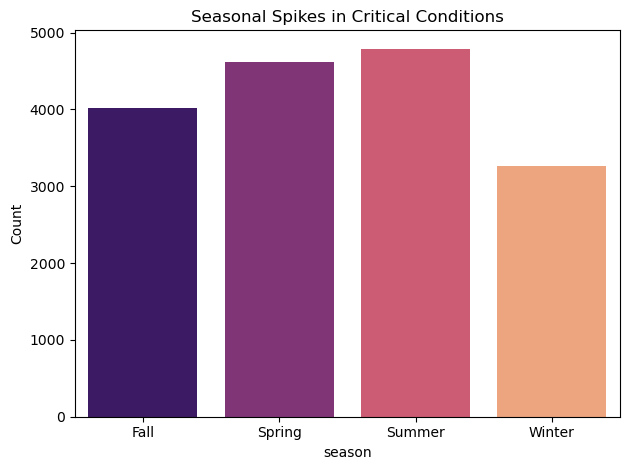

In [6]:
# Seasonal Spikes in Critical Conditions
seasonal_critical = df[df['condition_status'] == 'Critical'].groupby('season').size().reset_index(name='count')
sns.barplot(data=seasonal_critical, x='season', y='count', palette='magma')
plt.title("Seasonal Spikes in Critical Conditions")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('../visualizations/seasonal_critical_conditions.png')
plt.show()

Austin (TX)                          28237
Travis (TX)                           3244
Outside Jurisdiction                  1911
7201 Levander Loop in Austin (TX)     1345
Manor (TX)                             749
Name: found_location, dtype: int64


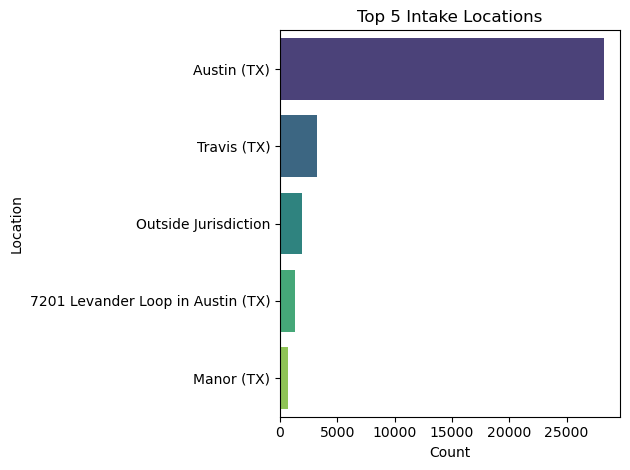

In [7]:
# Top 5 Locations for Animal Intakes
top_locations = df['found_location'].value_counts().head(5)
print(top_locations)

sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title("Top 5 Intake Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig('../visualizations/top_intake_locations.png')
plt.show()